In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn

from times import StyleScoreVAE
from ssvae_trainer import SSVAETrainer

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mf = pd.read_csv('./dataset/multifactor_score_20200228.csv', index_col=0, header=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
mf[mf['code'] == 'A005930']

,code,trade_date,pm_5,pm_10,pm_20,pm_40,pm_60,pm_90,pm_120,pm_250,...,skew_250,turnover_5,turnover_10,turnover_20,turnover_40,turnover_60,turnover_90,turnover_120,turnover_250,log_mktcap
540417,A005930,2013-01-16,0.307322,0.214752,0.269412,0.615642,0.538814,0.557029,0.584363,0.605800,...,0.746597,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540418,A005930,2013-01-17,0.275159,0.235175,0.278858,0.608623,0.549606,0.566829,0.570318,0.606448,...,0.745504,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540419,A005930,2013-01-18,0.273983,0.232215,0.232686,0.571636,0.521329,0.555522,0.538045,0.600005,...,0.746695,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540420,A005930,2013-01-21,0.249077,0.293283,0.155408,0.495594,0.501984,0.552491,0.519721,0.574298,...,0.737737,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
540421,A005930,2013-01-22,0.252724,0.261267,0.181221,0.475156,0.530265,0.524139,0.514964,0.578236,...,0.738419,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542161,A005930,2020-02-24,0.481342,0.594053,0.524048,0.629722,0.570931,0.456609,0.621955,0.587540,...,0.504917,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
542162,A005930,2020-02-25,0.621167,0.622022,0.490795,0.635911,0.574655,0.455983,0.633129,0.583706,...,0.504948,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
542163,A005930,2020-02-26,0.544780,0.594731,0.487116,0.628956,0.568410,0.574070,0.631351,0.586203,...,0.504860,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
542164,A005930,2020-02-27,0.623055,0.587245,0.526480,0.622305,0.569714,0.572765,0.635776,0.581822,...,0.504515,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
ssvae = StyleScoreVAE(41)

In [5]:
trainer = SSVAETrainer(ssvae, train_dataset=mf.values[:, 2:], test_dataset=mf.values[-100:, 2:],
                       beta=1, alpha=1)

In [6]:
trainer.train(epochs=10, batch_size=1024)

0 obj_loss: -27.03, recon: 35.16, overlap: 0.0077, sparsity: 0.0003: 100%|█████████| 3900/3900 [17:18<00:00,  3.76it/s]
1 obj_loss: -27.61, recon: 35.56, overlap: 0.0075, sparsity: 0.0002: 100%|█████████| 3900/3900 [17:16<00:00,  3.76it/s]
2 obj_loss: -29.09, recon: 37.38, overlap: 0.0079, sparsity: 0.0002: 100%|█████████| 3900/3900 [17:16<00:00,  3.76it/s]
3 obj_loss: -29.51, recon: 37.98, overlap: 0.0081, sparsity: 0.0002: 100%|█████████| 3900/3900 [17:16<00:00,  3.76it/s]
4 obj_loss: -29.98, recon: 38.65, overlap: 0.0083, sparsity: 0.0002: 100%|█████████| 3900/3900 [17:16<00:00,  3.76it/s]
5 obj_loss: -30.57, recon: 39.46, overlap: 0.0085, sparsity: 0.0002: 100%|█████████| 3900/3900 [17:16<00:00,  3.76it/s]
6 obj_loss: -30.89, recon: 39.82, overlap: 0.0085, sparsity: 0.0002: 100%|█████████| 3900/3900 [17:16<00:00,  3.76it/s]
7 obj_loss: -31.19, recon: 40.34, overlap: 0.0087, sparsity: 0.0002: 100%|█████████| 3900/3900 [17:16<00:00,  3.76it/s]
8 obj_loss: -31.34, recon: 40.86, overla

In [7]:
len(trainer.train_results['train_obj_loss'])

10

In [8]:
import matplotlib.pyplot as plt

In [9]:
obj_loss = trainer.train_results['train_obj_loss']
recon_loss = trainer.train_results['train_recon_loss']
overlap_loss = trainer.train_results['train_overlap_loss']
sparsity_loss = trainer.train_results['train_sparsity_loss']

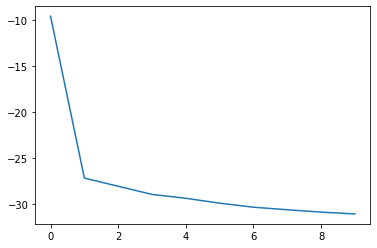

In [10]:
plt.plot(np.arange(len(obj_loss)), obj_loss)

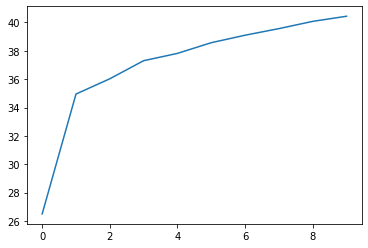

In [11]:
plt.plot(np.arange(len(recon_loss)), recon_loss)

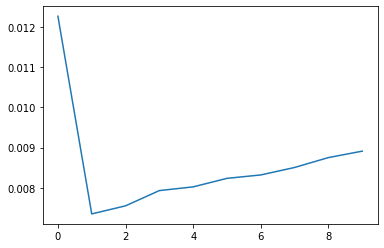

In [12]:
plt.plot(np.arange(len(overlap_loss)), overlap_loss)

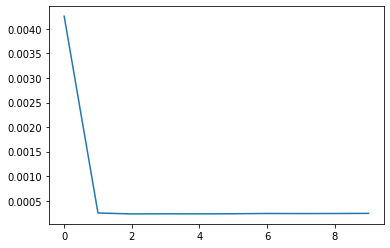

In [13]:
plt.plot(np.arange(len(sparsity_loss)), sparsity_loss)

In [14]:
trainer.trainset.shape

torch.Size([3993996, 41])

In [15]:
x = trainer.trainset[200].to(ssvae.device)
recon = ssvae.reconstruct(x)

In [16]:
qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

In [17]:
qz_x

Normal(loc: torch.Size([1, 16]), scale: torch.Size([1, 16]))

In [18]:
px_z

Laplace(loc: torch.Size([1, 41]), scale: torch.Size([1, 41]))

In [19]:
style_score

tensor([[ 0.0439,  0.0027,  0.0142,  0.0005,  0.0140, -0.0216,  0.0427, -0.0493,
         -0.0477,  0.0855,  0.0130,  0.0097, -0.0385, -0.0204, -0.0335, -0.0260]],
       device='cuda:0', grad_fn=<SqueezeBackward1>)

In [20]:
ssvae.dec(style_score)

(tensor([[0.3847, 0.3677, 0.3669, 0.3853, 0.4063, 0.4236, 0.4251, 0.4701, 0.3026,
          0.2778, 0.2334, 0.1941, 0.2015, 0.2121, 0.2030, 0.2310, 0.9337, 0.9224,
          0.9176, 0.9034, 0.8920, 0.8906, 0.8850, 0.8802, 0.4593, 0.4788, 0.4903,
          0.4924, 0.5029, 0.5159, 0.5297, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.3494]], device='cuda:0',
        grad_fn=<ReluBackward1>), tensor(0.1000, device='cuda:0'))

In [21]:
traverse = np.arange(-3., 3.1, 0.1).astype(float)

In [22]:
index = np.random.choice(np.arange(len(trainer.trainset)), 500, replace=False)

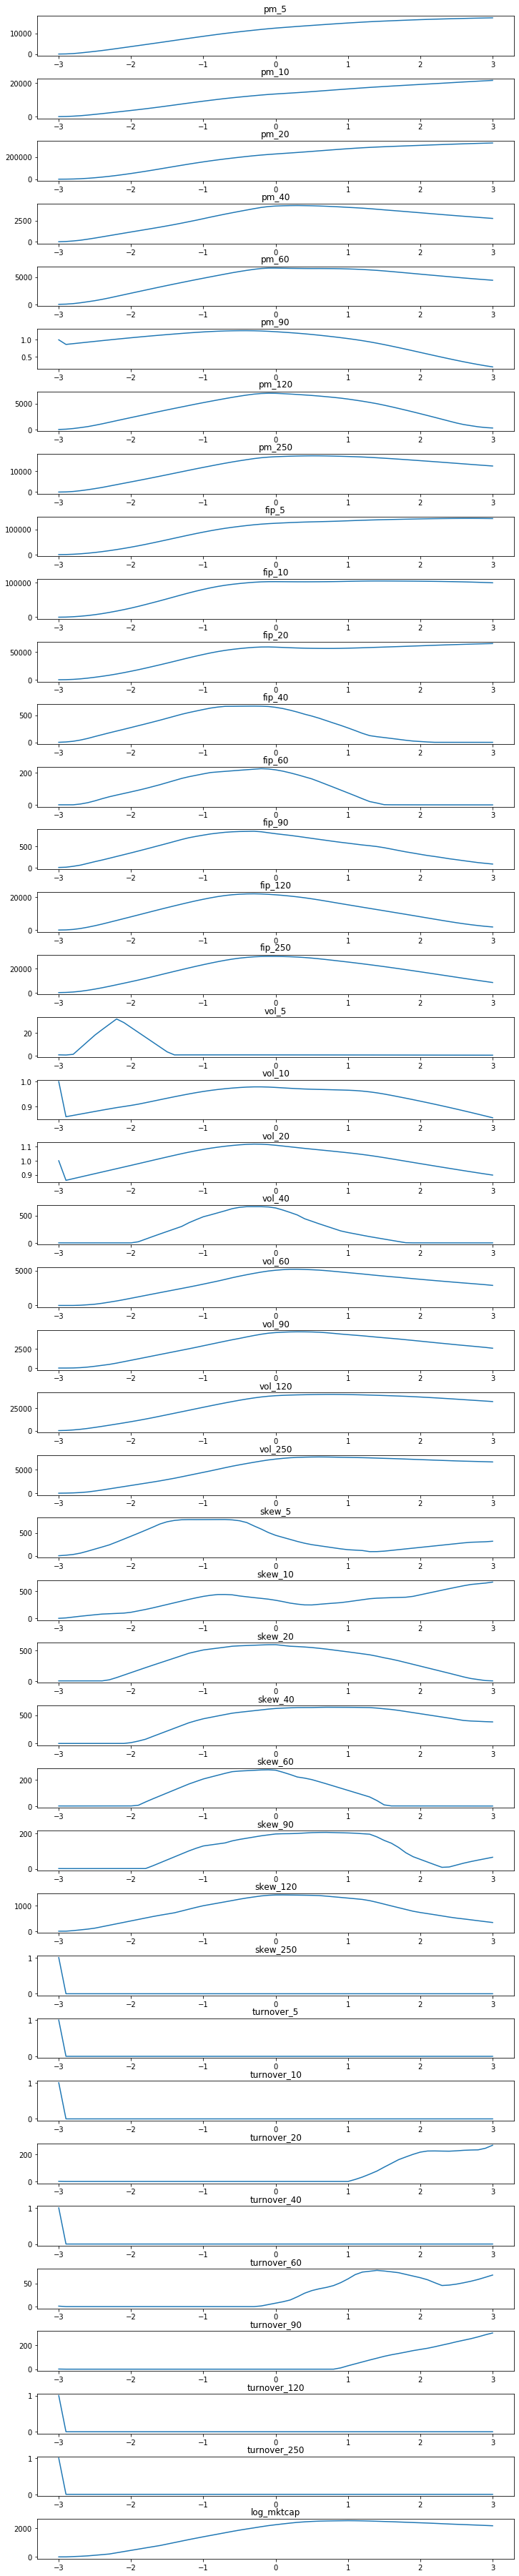

In [81]:
# Style 1
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 0] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

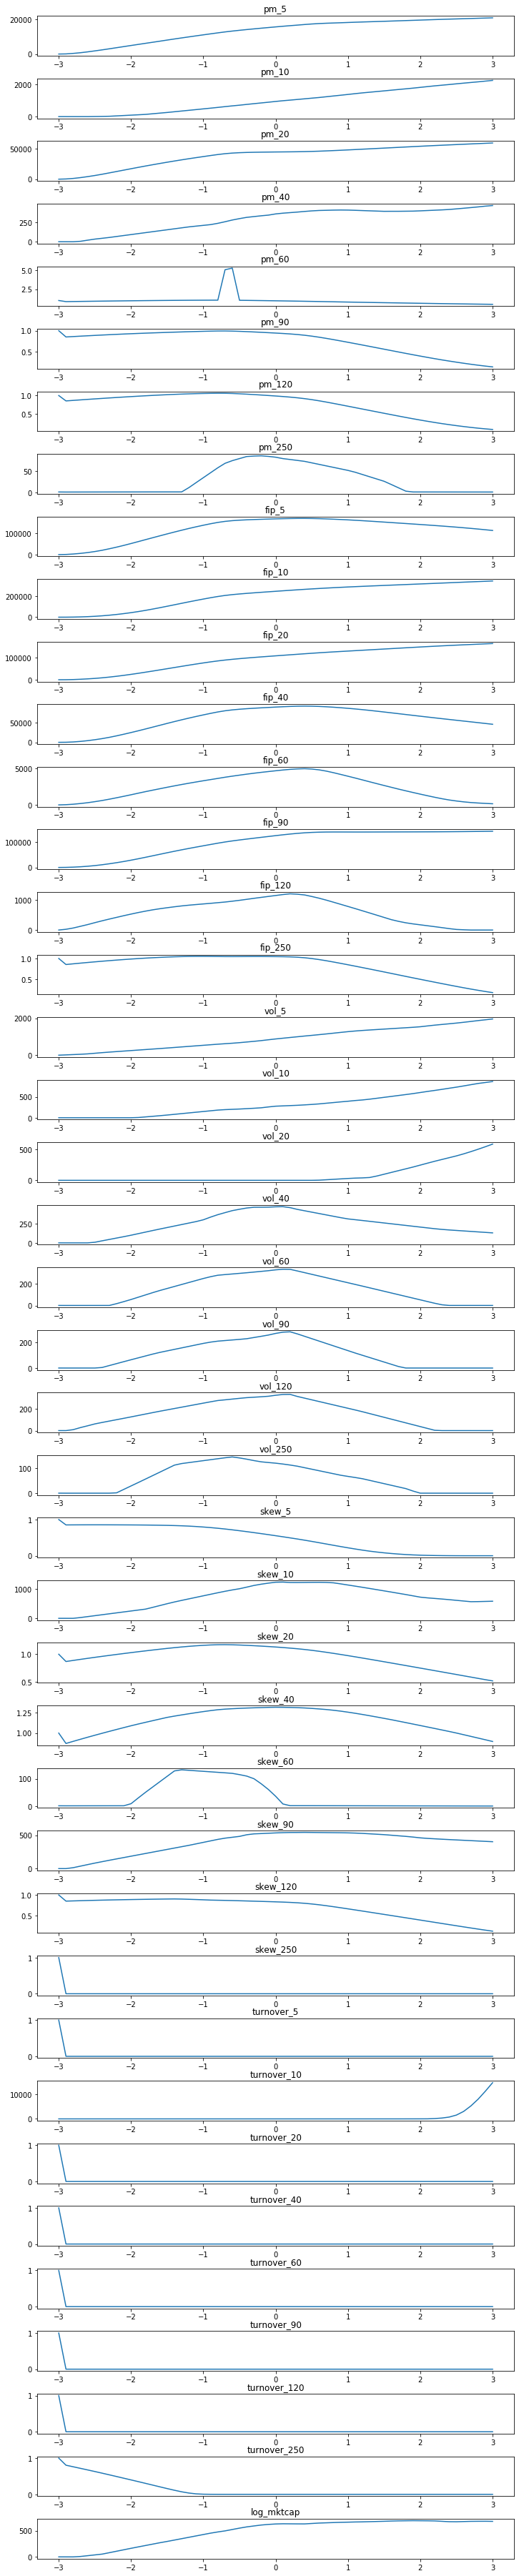

In [82]:
# Style 2
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 1] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

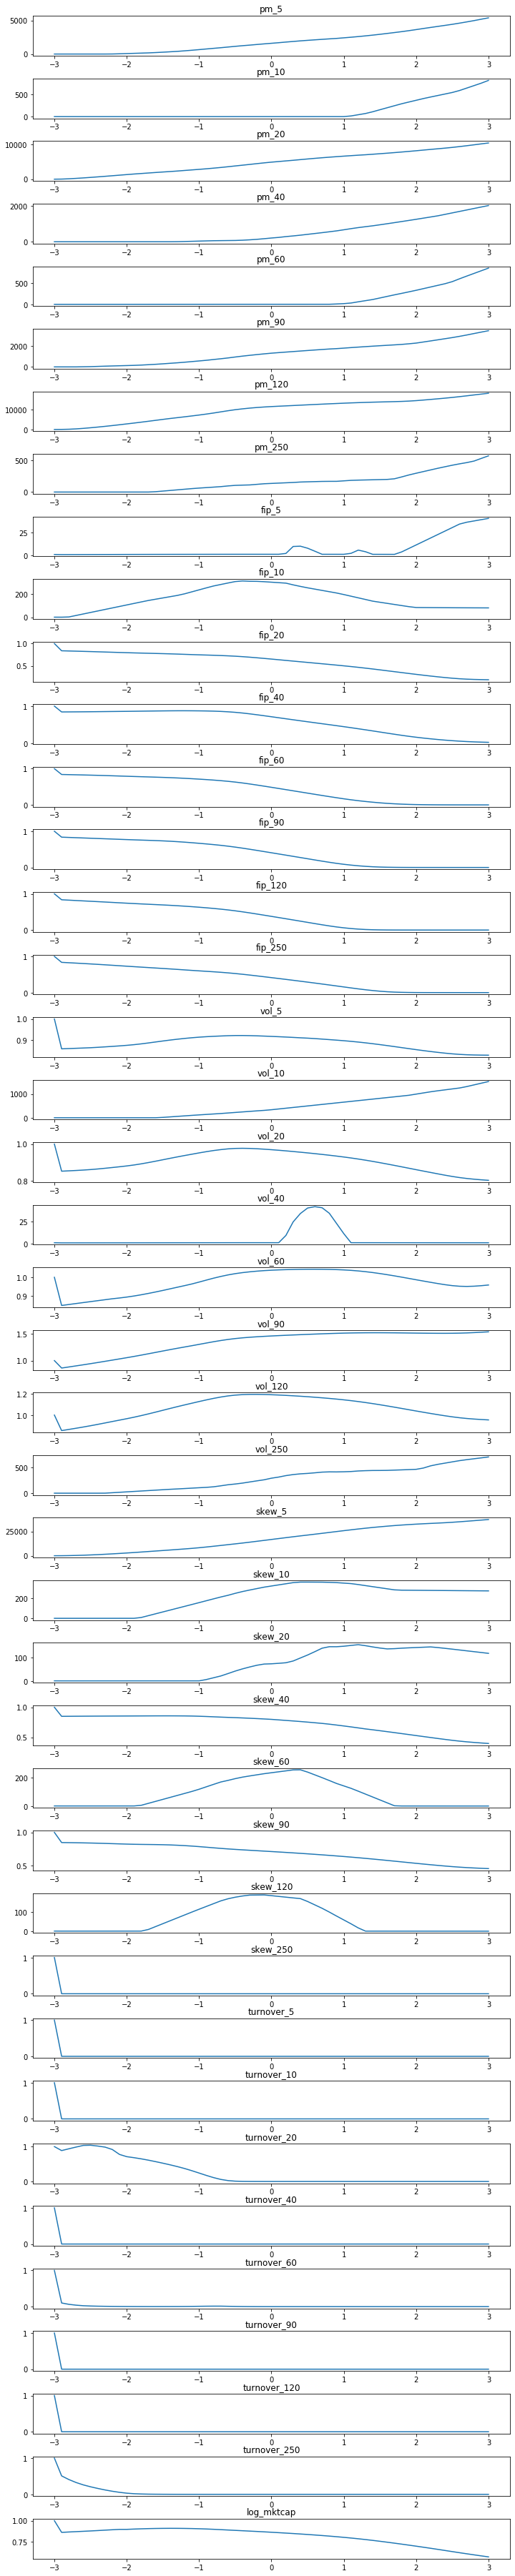

In [83]:
# Style 3
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 2] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

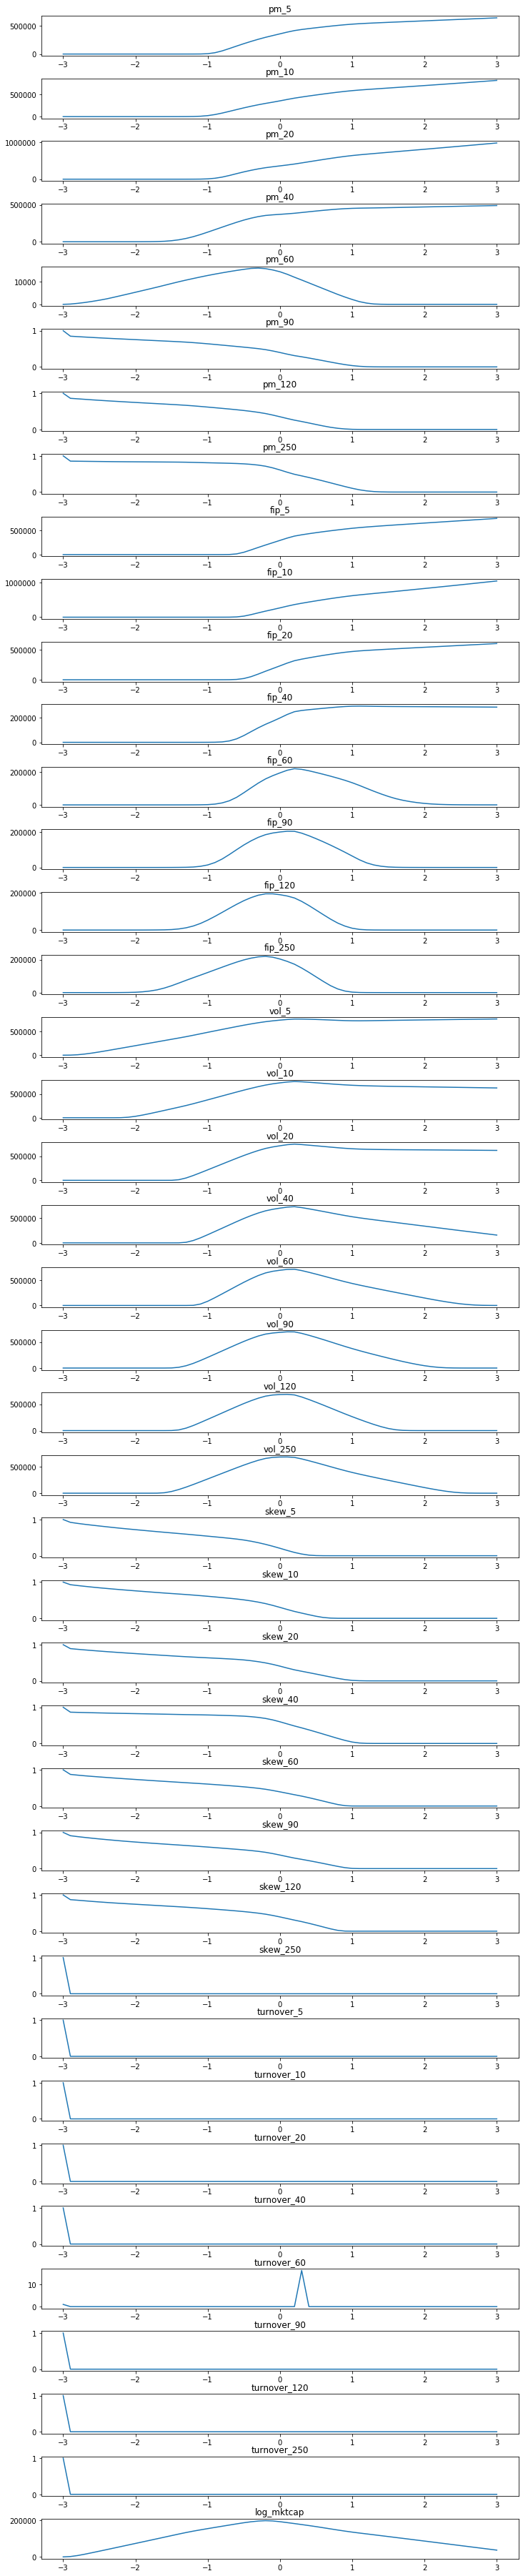

In [84]:
# Style 4
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 3] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    #axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

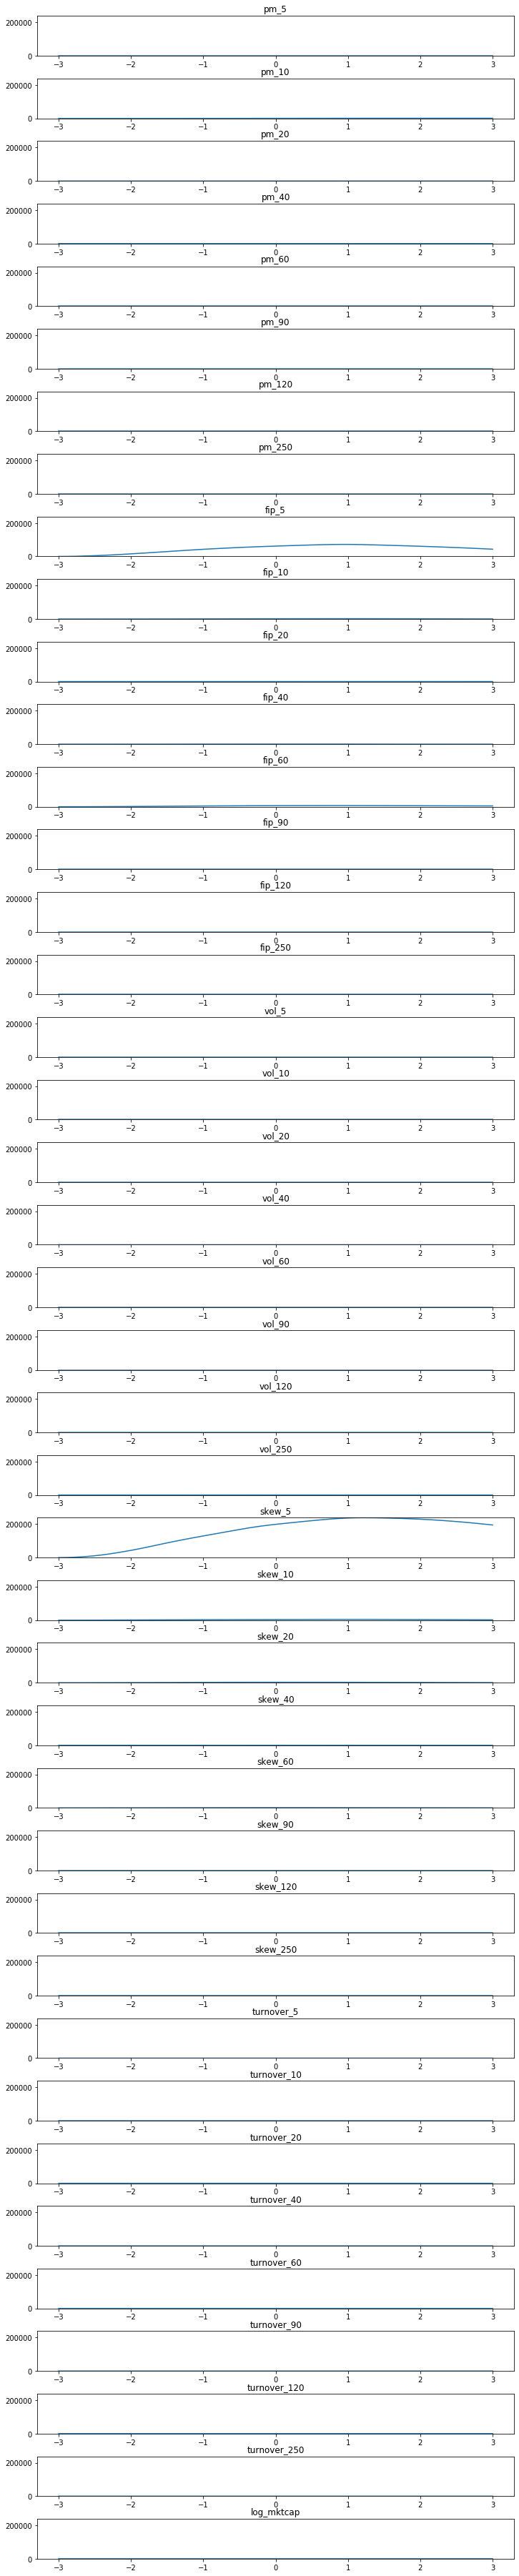

In [69]:
# Style 5
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 4] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

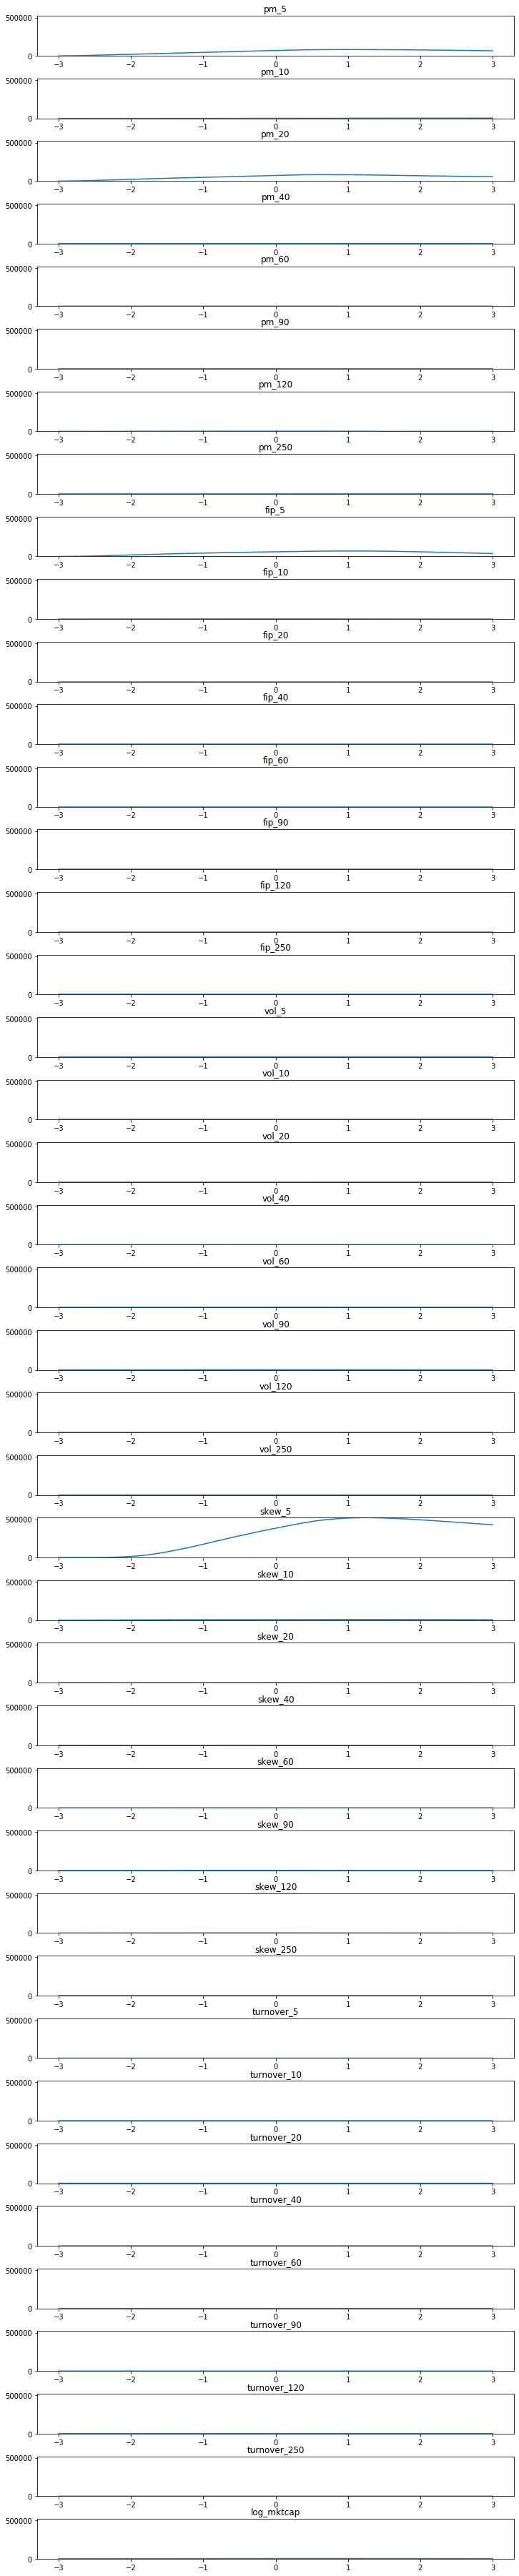

In [70]:
# Style 6
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 5] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

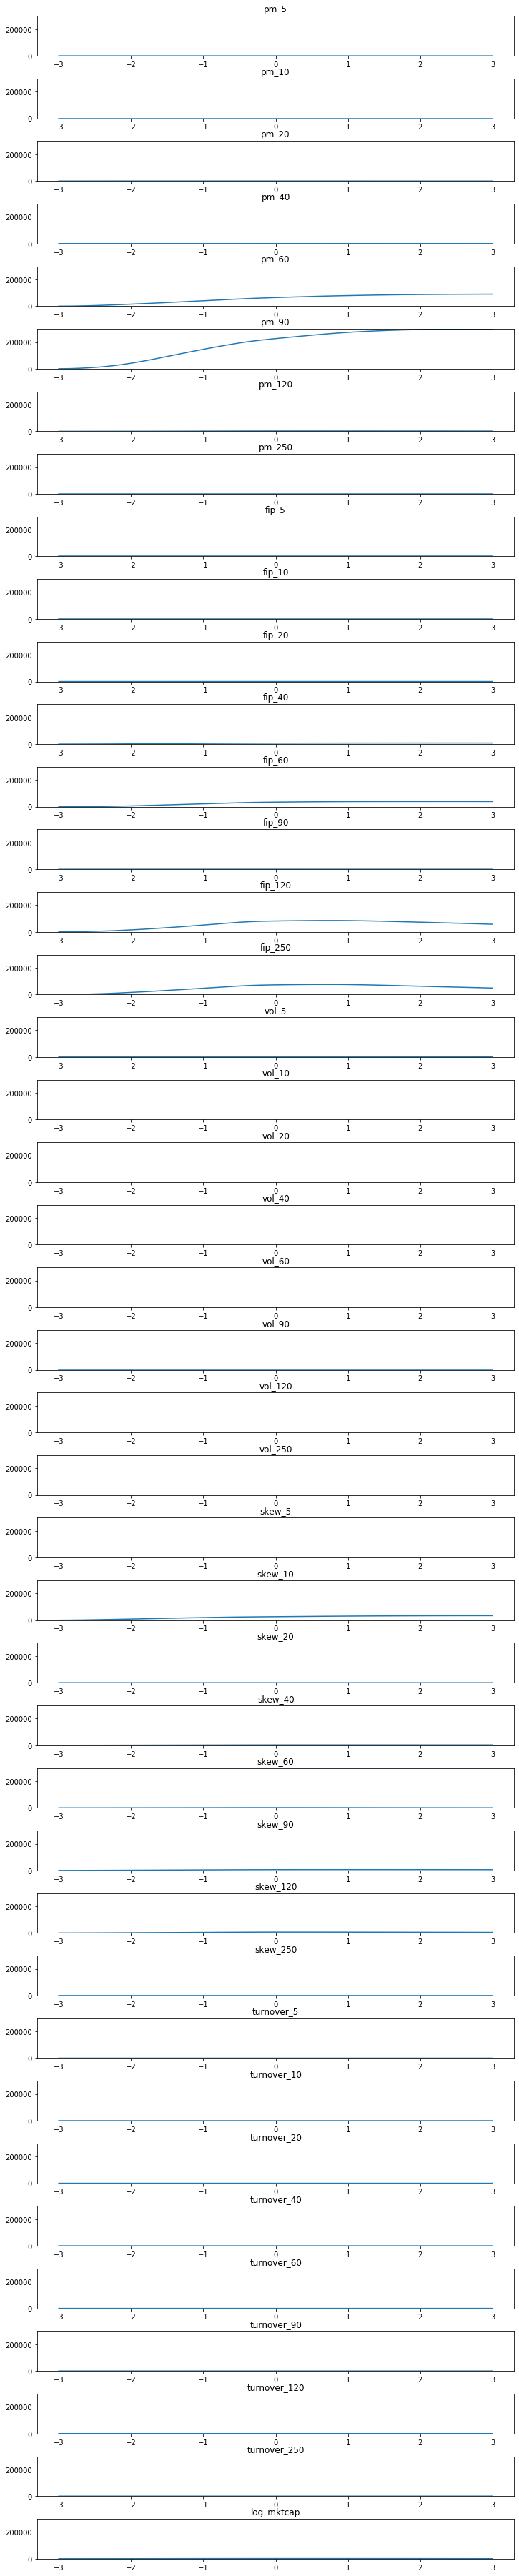

In [71]:
# Style 7
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 6] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

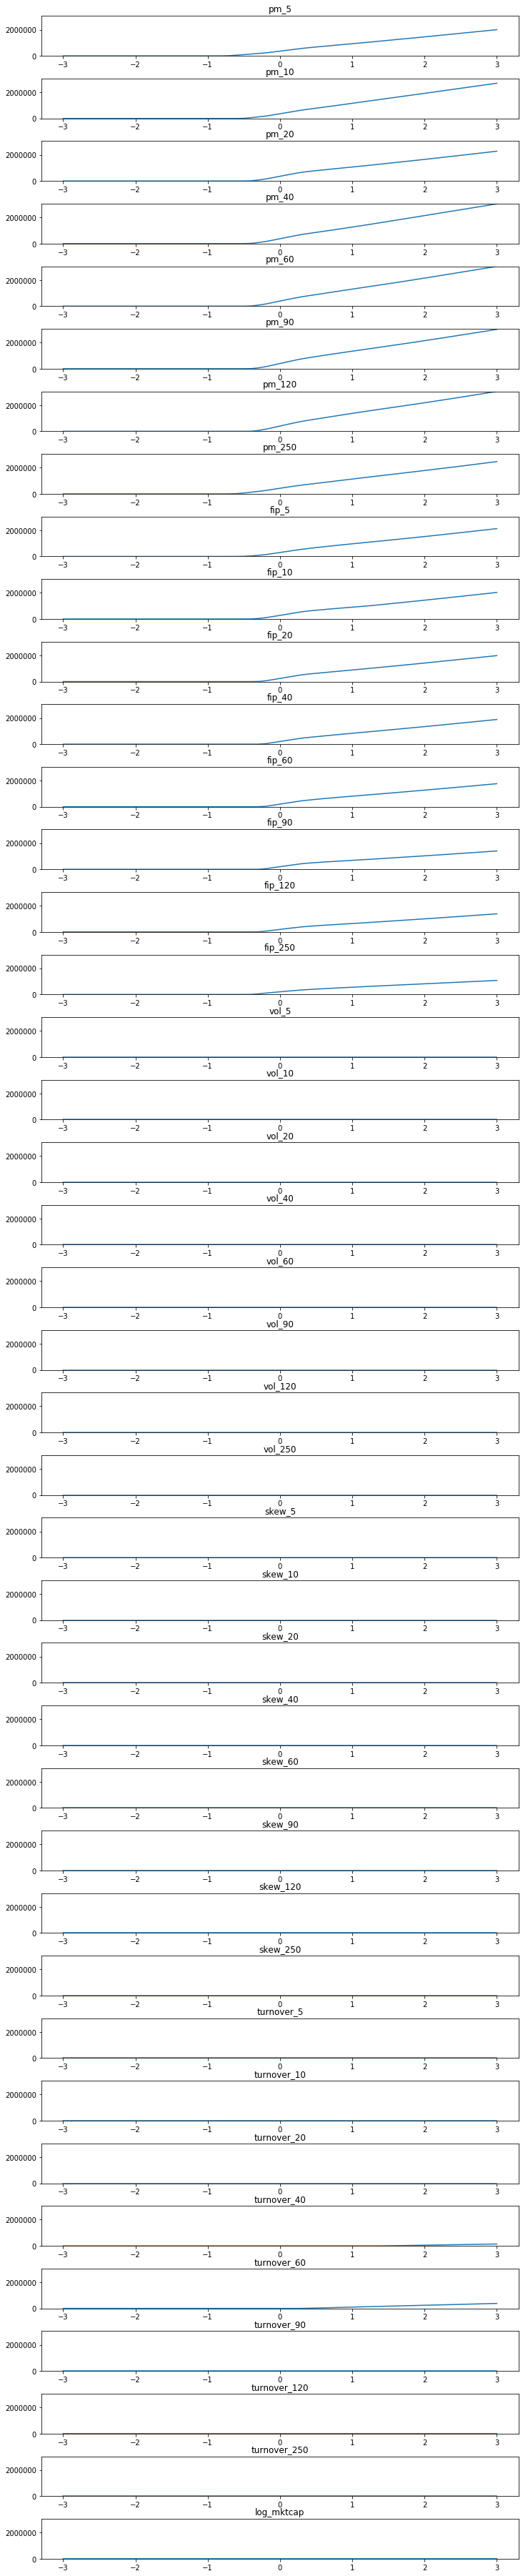

In [72]:
# Style 8
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 7] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

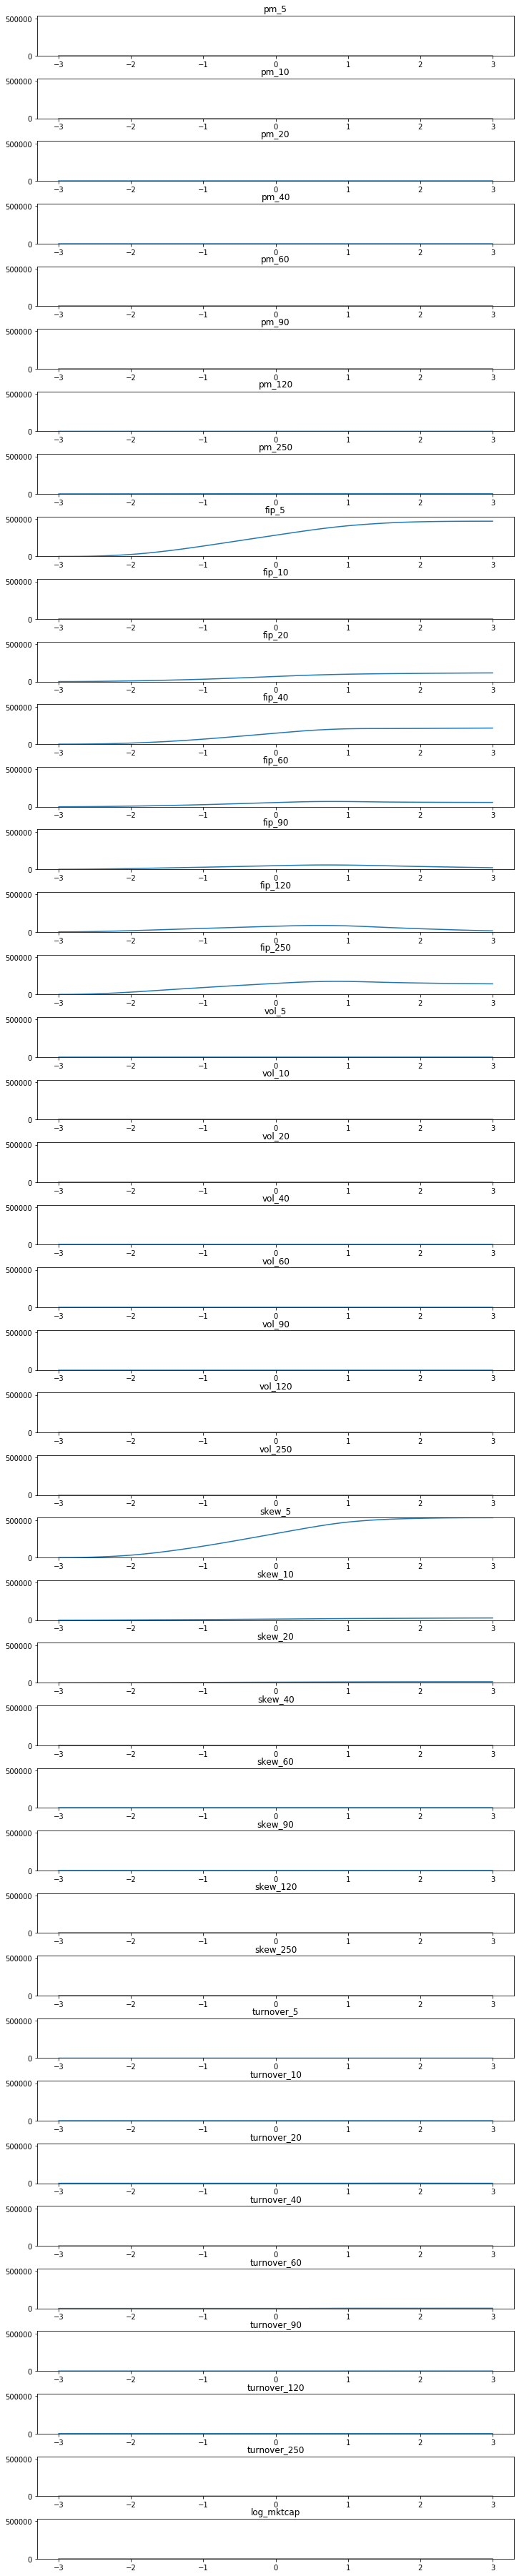

In [73]:
# Style 9
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 8] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

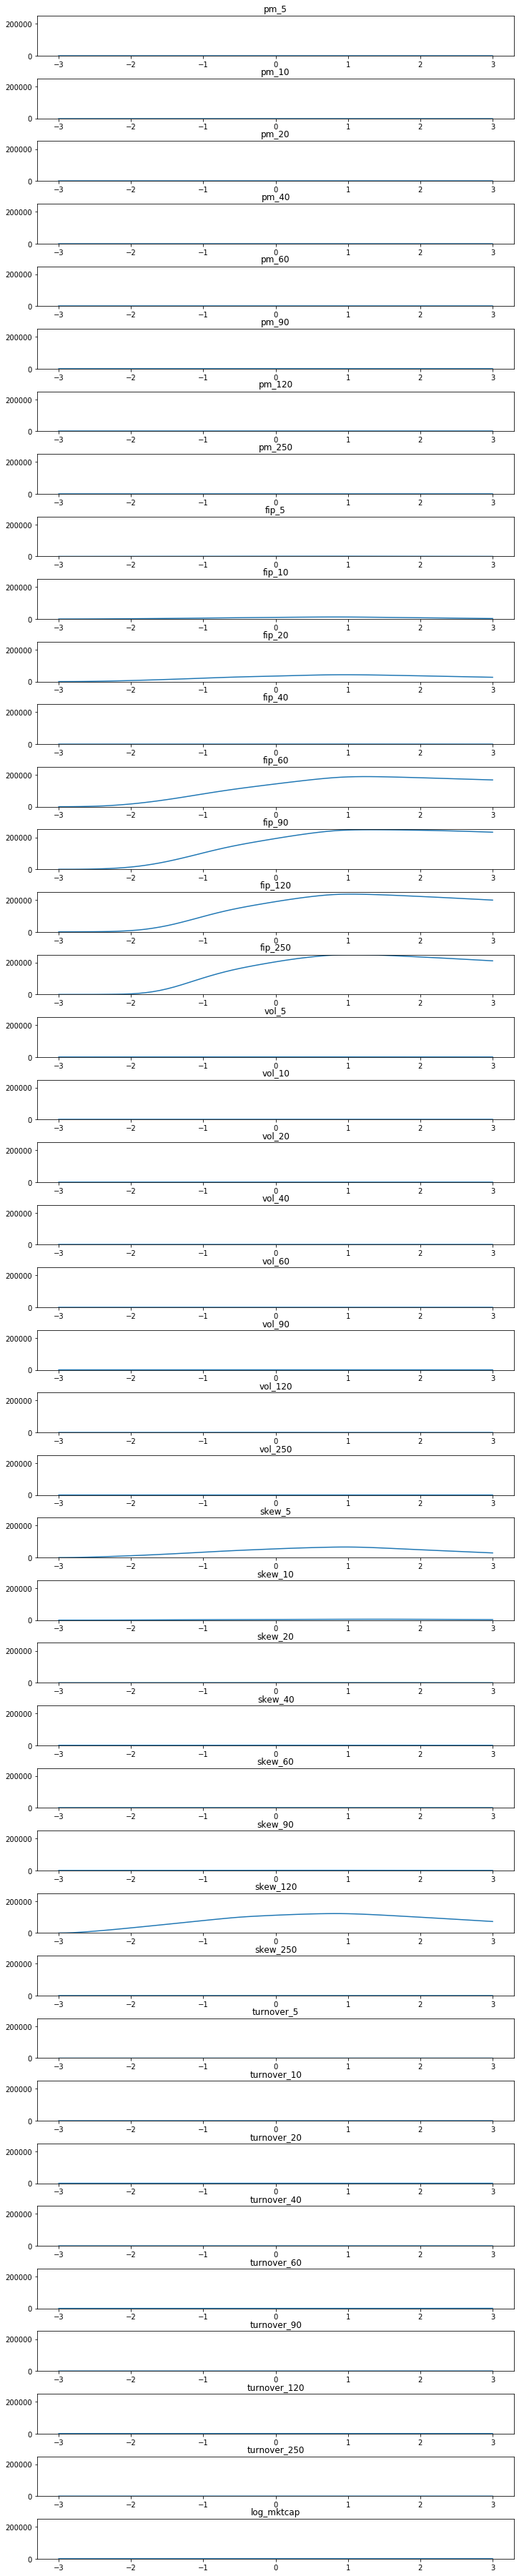

In [74]:
# Style 10
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 9] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

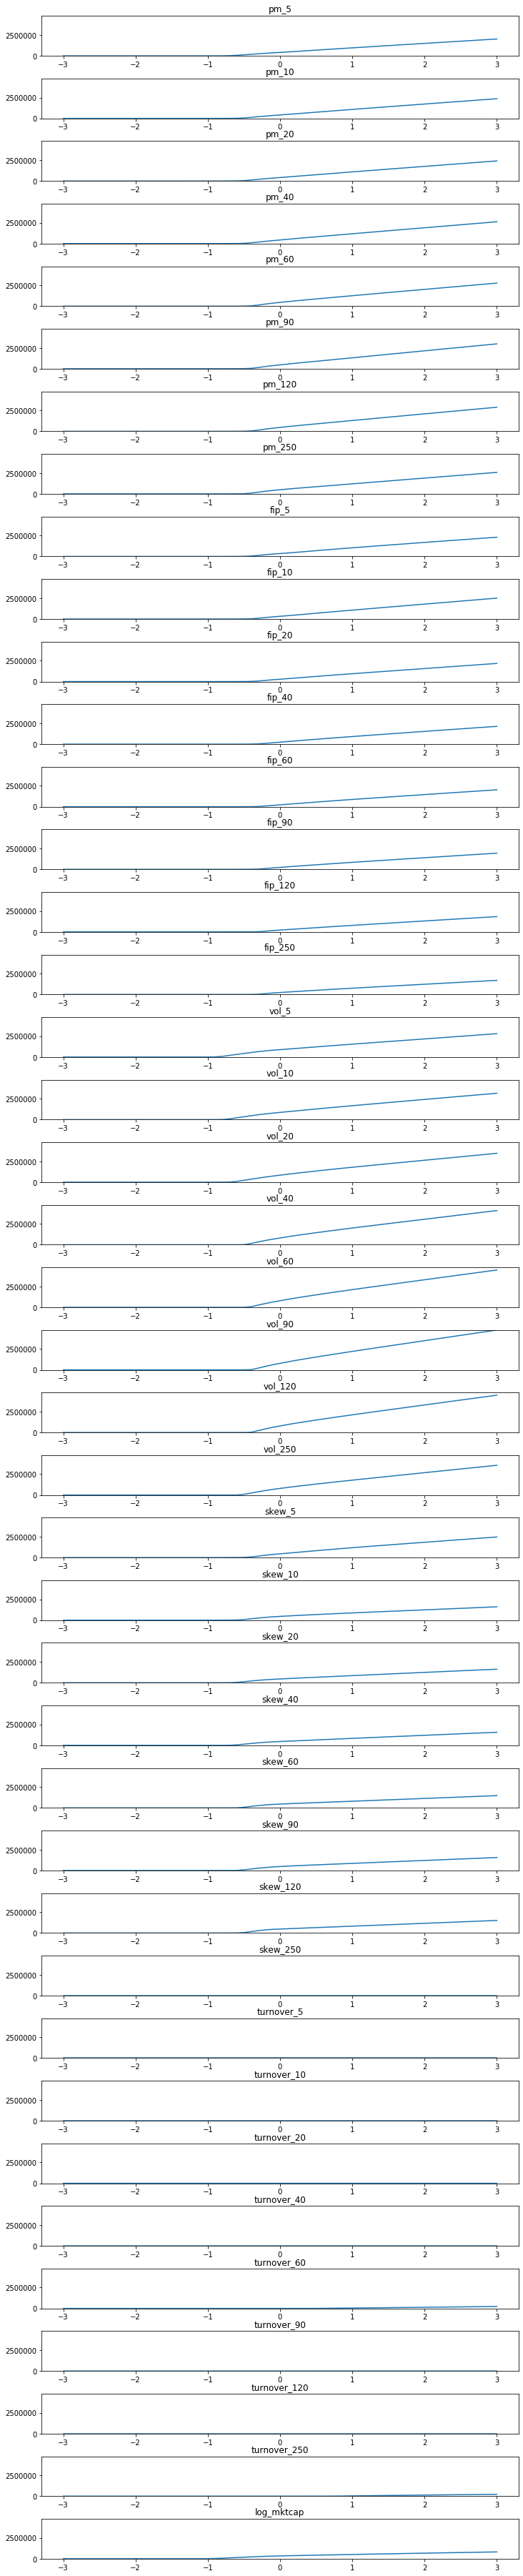

In [75]:
# Style 11
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 10] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

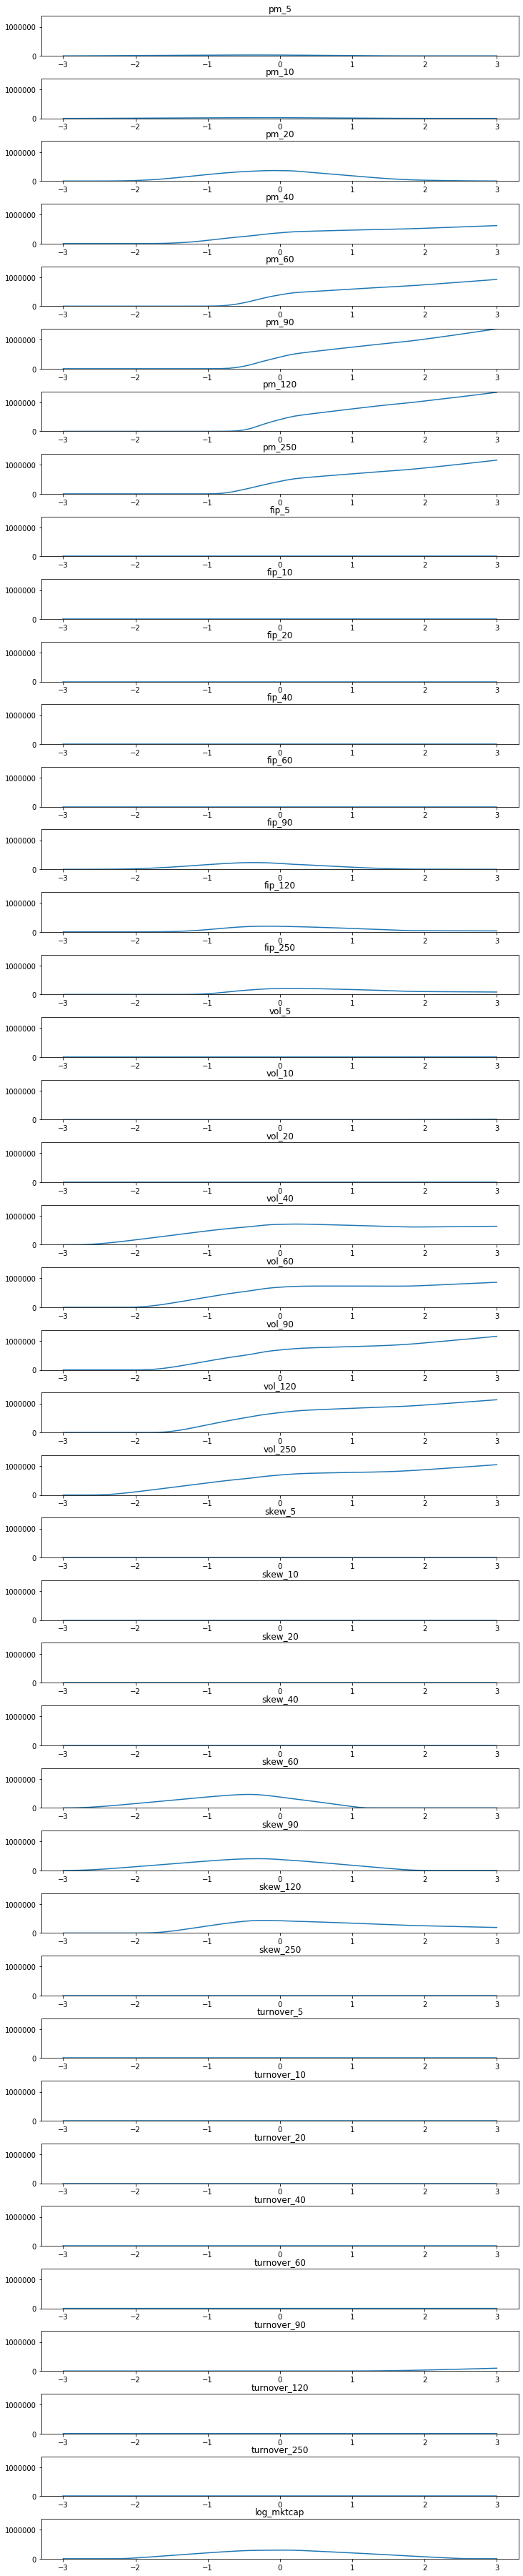

In [76]:
# Style 12
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 11] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

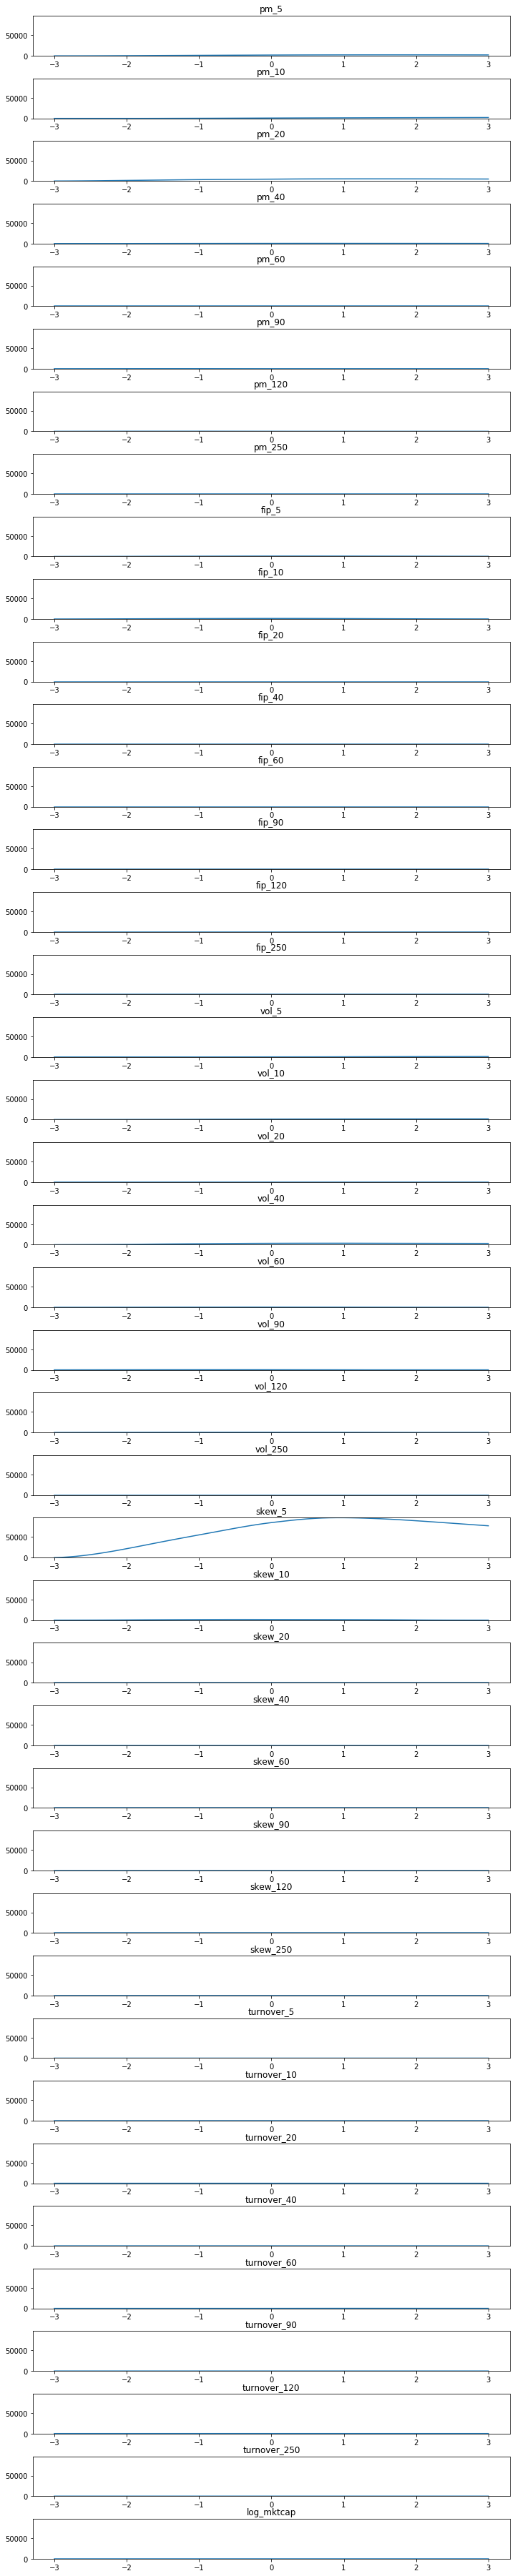

In [77]:
# Style 13
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 12] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

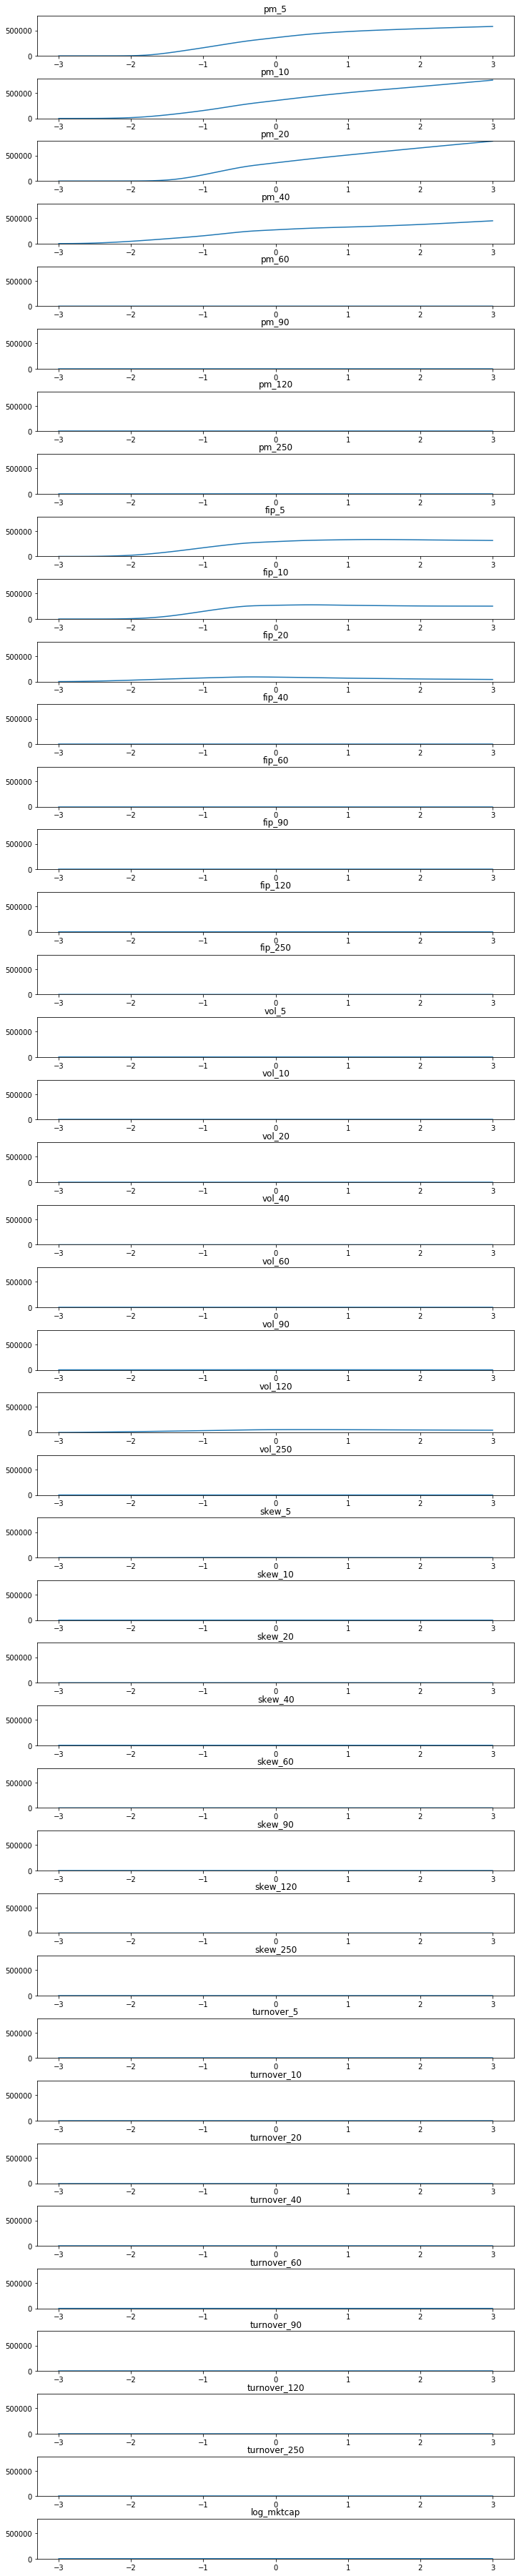

In [78]:
# Style 14
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 13] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

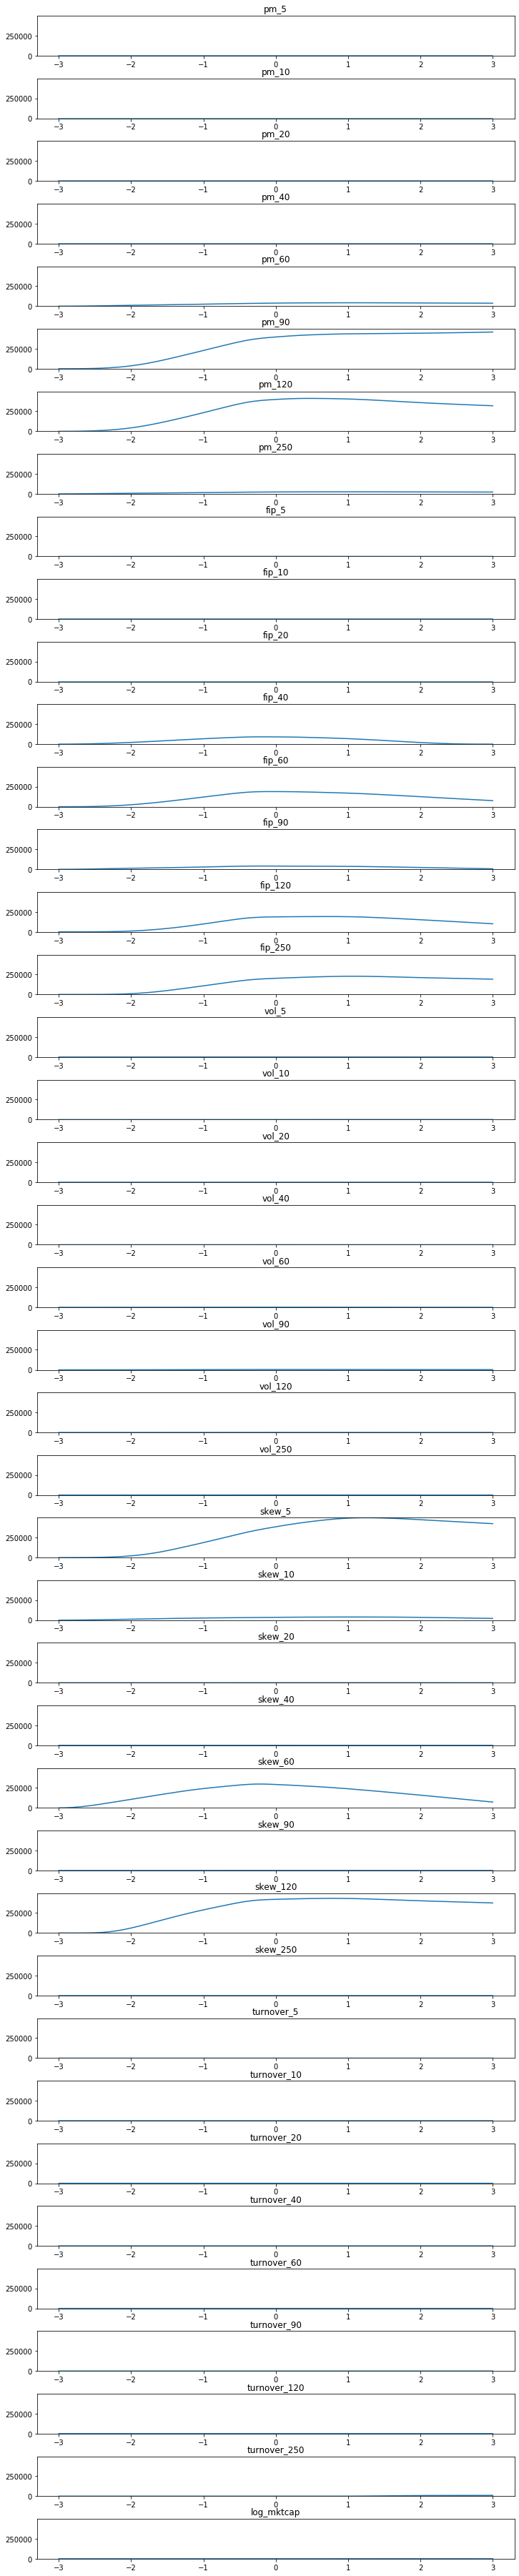

In [79]:
# Style 15
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 14] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])

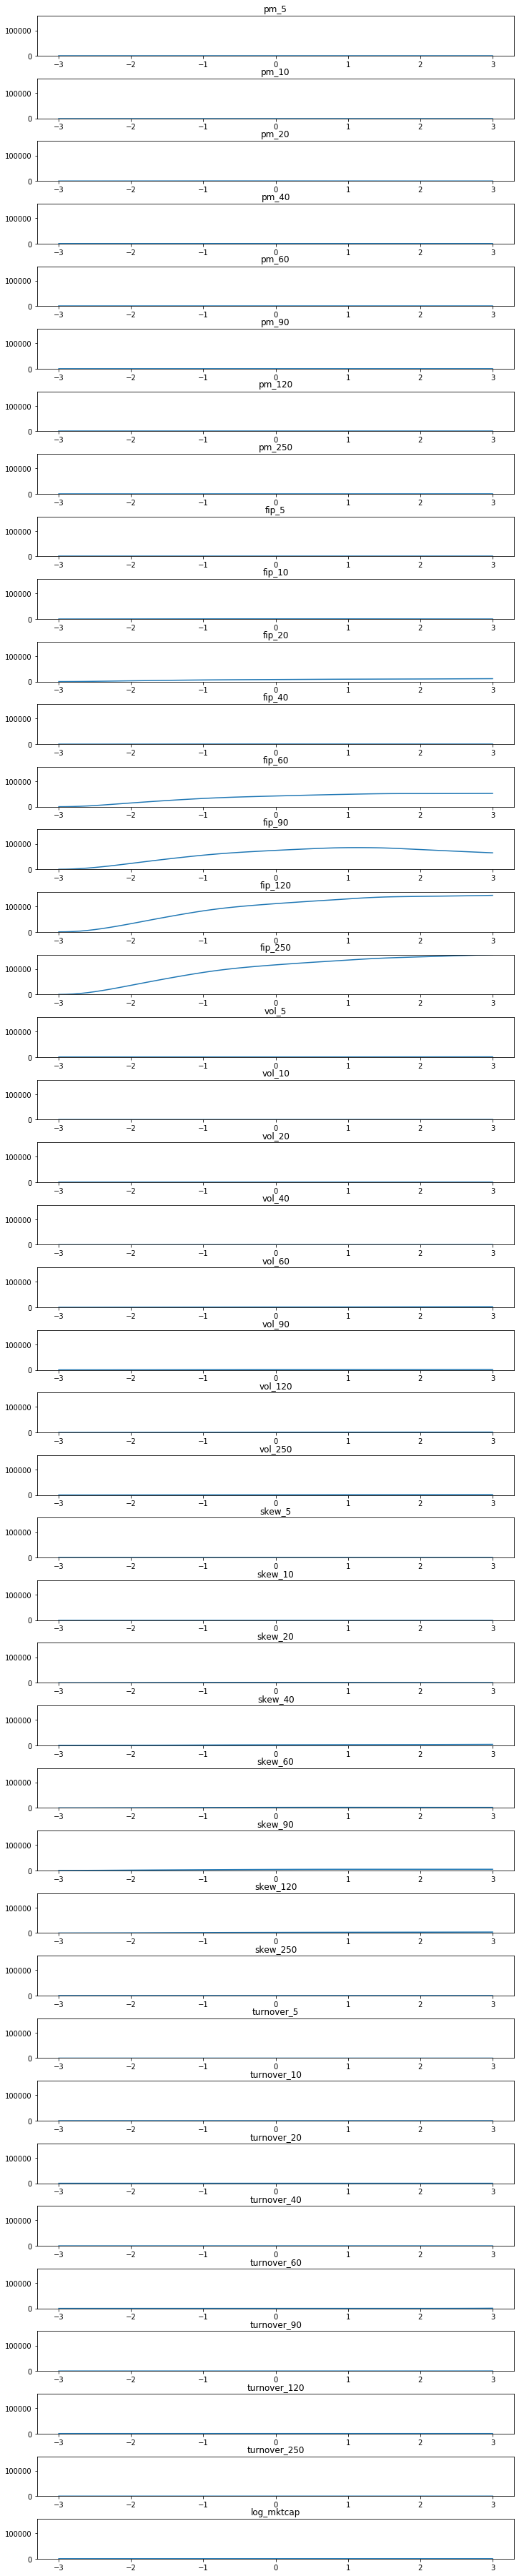

In [80]:
# Style 16
traversals = np.zeros((len(traverse), 41))
for i in range(len(index)):
    x = trainer.trainset[index[i]].to(ssvae.device)
    recon = ssvae.reconstruct(x)

    qz_x, px_z, style_score = ssvae(x.unsqueeze(0))

    traversal = []
    for t in traverse:
        t_style = torch.zeros_like(style_score).to(ssvae.device)
        t_style[0, :] = style_score[0]
        t_style[0, 15] = t
        recon, _ = ssvae.dec(t_style)
        traversal.append(recon.squeeze(0).cpu().detach().numpy())
    traversal = np.array(traversal)
    for i in range(41):
        if traversal[0, i] == 0.:
            traversal[0, i] += 1e-6
        traversal[:, i] /= traversal[0, i]
    traversal = np.array(traversal)
    traversals += traversal
traversals /= len(index)

fig, axs = plt.subplots(traversals.shape[1], 1)
fig.set_figheight(50)
fig.set_figwidth(10)
fig.tight_layout()
for i in range(traversals.shape[1]):
    axs[i].plot(traverse, traversals[:, i])
    axs[i].set_ylim(ymax=traversals.max(), ymin=traversals.min())
    axs[i].set_title(mf.columns[2 + i])